# Setup

In [13]:
# import your standard packages
%run pkgs.py

# import your local functions
sys.path.insert(1, '../')
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Paths and Parameters

In [14]:

bounds_wAS = [51.125,66,12.5,28]
bounds_AS = [66,79,3,28]
bounds_wBoB = [79,87,2,28]
bounds_BoB = [87,103,0,28]

hyp_thresh = 61

IODyear_begin = '-06-01' # month-day of IOD year
IODyear_end = '-05-31' # month-day of year AFTER IOD year

# Get Data

In [15]:
# AWG
ds_WOD = xr.open_dataset('../data/wod_processed_old.nc')
ds_WOD

<xarray.Dataset>
Dimensions:                      (coastal_loc: 314731, coastal_pos: 114865, lonmin,lonmax,latmin,latmax: 4, pres: 57, time: 314731)
Coordinates:
  * time                         (time) datetime64[ns] 1770-01-01 ... 2020-05-31
  * pres                         (pres) int64 0 5 10 15 ... 1350 1400 1450 1500
  * coastal_loc                  (coastal_loc) int64 0 1 2 ... 314729 314730
  * coastal_pos                  (coastal_pos) int64 0 1 2 ... 114863 114864
  * lonmin,lonmax,latmin,latmax  (lonmin,lonmax,latmin,latmax) int64 0 1 2 3
Data variables:
    temp                         (time, pres) float64 ...
    sal                          (time, pres) float64 ...
    doxy                         (time, pres) float64 ...
    nitrate                      (time, pres) float64 ...
    phosphate                    (time, pres) float64 ...
    lat                          (time) float32 ...
    lon                          (time) float32 ...
    temp_40_200                  (ti

In [16]:
# WOA
ds_WOA = xr.open_dataset('../data/woa_processed_old.nc')
ds_WOA

<xarray.Dataset>
Dimensions:                      (coastal_loc: 1925, coastal_pos: 439, lat: 35, lon: 55, lonmin,lonmax,latmin,latmax: 4, month: 12, pres: 57)
Coordinates:
  * month                        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * pres                         (pres) float32 0.0 5.0 10.0 ... 1450.0 1500.0
  * lon                          (lon) float32 48.5 49.5 50.5 ... 101.5 102.5
  * lat                          (lat) float32 -1.5 -0.5 0.5 ... 30.5 31.5 32.5
  * coastal_loc                  (coastal_loc) int64 0 1 2 3 ... 1922 1923 1924
  * coastal_pos                  (coastal_pos) int64 0 1 2 3 ... 435 436 437 438
  * lonmin,lonmax,latmin,latmax  (lonmin,lonmax,latmin,latmax) int64 0 1 2 3
Data variables:
    temp                         (month, pres, lat, lon) float64 ...
    psal                         (month, pres, lat, lon) float64 ...
    doxy                         (month, pres, lat, lon) float64 ...
    nitrate                      (month, pres, lat, lon)

# Subset

## Interannual

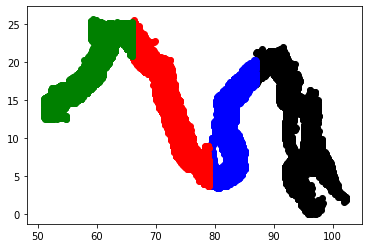

In [17]:
#----------------- Western Arabian Sea ---------------------#

ind_wAS_ia = (ds_WOD.lon < bounds_wAS[1]) & (ds_WOD.lon > bounds_wAS[0]) & (ds_WOD.lat < bounds_wAS[3]) & (ds_WOD.lat > bounds_wAS[2]) 

#subset gridded data
temp_wAS_ia = ds_WOD.temp_50_200[ind_wAS_ia]
doxy_wAS_ia = ds_WOD.doxy_50_200[ind_wAS_ia]
# nitrate_wAS_ia = ds_WOD.nitrate_50_200[ind_wAS_ia]
lat_wAS_ia = ds_WOD.lat[ind_wAS_ia]
lon_wAS_ia = ds_WOD.lon[ind_wAS_ia]
time_wAS_ia = ds_WOD.time[ind_wAS_ia]
mon_wAS_ia = time_wAS_ia.dt.month
    
# convert to coastal
mask_wAS_ia = mask_coast(np.array(lon_wAS_ia),np.array(lat_wAS_ia),np.array(ds_WOD.coastal_mask_bounds))
temp_wAS_ia = temp_wAS_ia[mask_wAS_ia]
doxy_wAS_ia = doxy_wAS_ia[mask_wAS_ia]
# nitrate_wAS_ia = nitrate_wAS_ia[mask_wAS_ia]
lat_wAS_ia = lat_wAS_ia[mask_wAS_ia]
lon_wAS_ia = lon_wAS_ia[mask_wAS_ia]
time_wAS_ia = time_wAS_ia[mask_wAS_ia]
mon_wAS_ia = mon_wAS_ia[mask_wAS_ia]

#----------------- Arabian Sea ---------------------#

ind_AS_ia = (ds_WOD.lon < bounds_AS[1]) & (ds_WOD.lon > bounds_AS[0]) & (ds_WOD.lat < bounds_AS[3]) & (ds_WOD.lat > bounds_AS[2]) 

#subset gridded data
temp_AS_ia = ds_WOD.temp_50_200[ind_AS_ia]
doxy_AS_ia = ds_WOD.doxy_50_200[ind_AS_ia]
# nitrate_AS_ia = ds_WOD.nitrate_50_200[ind_AS_ia]
lat_AS_ia = ds_WOD.lat[ind_AS_ia]
lon_AS_ia = ds_WOD.lon[ind_AS_ia]
time_AS_ia = ds_WOD.time[ind_AS_ia]
mon_AS_ia = time_AS_ia.dt.month
    
# convert to coastal
mask_AS_ia = mask_coast(np.array(lon_AS_ia),np.array(lat_AS_ia),np.array(ds_WOD.coastal_mask_bounds))
temp_AS_ia = temp_AS_ia[mask_AS_ia]
doxy_AS_ia = doxy_AS_ia[mask_AS_ia]
# nitrate_AS_ia = nitrate_AS_ia[mask_AS_ia]
lat_AS_ia = lat_AS_ia[mask_AS_ia]
lon_AS_ia = lon_AS_ia[mask_AS_ia]
time_AS_ia = time_AS_ia[mask_AS_ia]
mon_AS_ia = mon_AS_ia[mask_AS_ia]

#----------------- NW BoB ---------------------#
ind_nwBoB_ia = (ds_WOD.lon < bounds_nwBoB[1]) & (ds_WOD.lon > bounds_nwBoB[0]) & (ds_WOD.lat < bounds_nwBoB[3]) & (ds_WOD.lat > bounds_nwBoB[2]) 

#subset gridded data
temp_nwBoB_ia = ds_WOD.temp_50_200[ind_nwBoB_ia]
doxy_nwBoB_ia = ds_WOD.doxy_50_200[ind_nwBoB_ia]
# nitrate_nwBoB_ia = ds_WOD.nitrate_50_200[ind_nwBoB_ia]
lat_nwBoB_ia = ds_WOD.lat[ind_nwBoB_ia]
lon_nwBoB_ia = ds_WOD.lon[ind_nwBoB_ia]
time_nwBoB_ia = ds_WOD.time[ind_nwBoB_ia]
mon_nwBoB_ia = time_nwBoB_ia.dt.month
    
# convert to coastal
mask_nwBoB_ia = mask_coast(np.array(lon_nwBoB_ia),np.array(lat_nwBoB_ia),np.array(ds_WOD.coastal_mask_bounds))
temp_nwBoB_ia = temp_nwBoB_ia[mask_nwBoB_ia]
doxy_nwBoB_ia = doxy_nwBoB_ia[mask_nwBoB_ia]
# nitrate_nwBoB_ia = nitrate_nwBoB_ia[mask_nwBoB_ia]
lat_nwBoB_ia = lat_nwBoB_ia[mask_nwBoB_ia]
lon_nwBoB_ia = lon_nwBoB_ia[mask_nwBoB_ia]
time_nwBoB_ia = time_nwBoB_ia[mask_nwBoB_ia]
mon_nwBoB_ia = mon_nwBoB_ia[mask_nwBoB_ia]

#----------------- SW BoB ---------------------#
ind_swBoB_ia = (ds_WOD.lon < bounds_swBoB[1]) & (ds_WOD.lon > bounds_swBoB[0]) & (ds_WOD.lat < bounds_swBoB[3]) & (ds_WOD.lat > bounds_swBoB[2]) 

#subset gridded data
temp_swBoB_ia = ds_WOD.temp_50_200[ind_swBoB_ia]
doxy_swBoB_ia = ds_WOD.doxy_50_200[ind_swBoB_ia]
# nitrate_swBoB_ia = ds_WOD.nitrate_50_200[ind_swBoB_ia]
lat_swBoB_ia = ds_WOD.lat[ind_swBoB_ia]
lon_swBoB_ia = ds_WOD.lon[ind_swBoB_ia]
time_swBoB_ia = ds_WOD.time[ind_swBoB_ia]
mon_swBoB_ia = time_swBoB_ia.dt.month
    
# convert to coastal
mask_swBoB_ia = mask_coast(np.array(lon_swBoB_ia),np.array(lat_swBoB_ia),np.array(ds_WOD.coastal_mask_bounds))
temp_swBoB_ia = temp_swBoB_ia[mask_swBoB_ia]
doxy_swBoB_ia = doxy_swBoB_ia[mask_swBoB_ia]
# nitrate_swBoB_ia = nitrate_swBoB_ia[mask_swBoB_ia]
lat_swBoB_ia = lat_swBoB_ia[mask_swBoB_ia]
lon_swBoB_ia = lon_swBoB_ia[mask_swBoB_ia]
time_swBoB_ia = time_swBoB_ia[mask_swBoB_ia]
mon_swBoB_ia = mon_swBoB_ia[mask_swBoB_ia]

#---------------- Western Bay of Bengal --------------------#

ind_wBoB_ia = (ds_WOD.lon < bounds_wBoB[1]) & (ds_WOD.lon > bounds_wBoB[0]) & (ds_WOD.lat < bounds_wBoB[3]) & (ds_WOD.lat > bounds_wBoB[2]) 

#subset gridded data
temp_wBoB_ia = ds_WOD.temp_50_200[ind_wBoB_ia]
doxy_wBoB_ia = ds_WOD.doxy_50_200[ind_wBoB_ia]
# nitrate_wBoB_ia = ds_WOD.nitrate_50_200[ind_wBoB_ia]
lat_wBoB_ia = ds_WOD.lat[ind_wBoB_ia]
lon_wBoB_ia = ds_WOD.lon[ind_wBoB_ia]
time_wBoB_ia = ds_WOD.time[ind_wBoB_ia]
mon_wBoB_ia = time_wBoB_ia.dt.month
    
# convert to coastal
mask_wBoB_ia = mask_coast(np.array(lon_wBoB_ia),np.array(lat_wBoB_ia),np.array(ds_WOD.coastal_mask_bounds))
temp_wBoB_ia = temp_wBoB_ia[mask_wBoB_ia]
doxy_wBoB_ia = doxy_wBoB_ia[mask_wBoB_ia]
# nitrate_wBoB_ia = nitrate_wBoB_ia[mask_wBoB_ia]
lat_wBoB_ia = lat_wBoB_ia[mask_wBoB_ia]
lon_wBoB_ia = lon_wBoB_ia[mask_wBoB_ia]
time_wBoB_ia = time_wBoB_ia[mask_wBoB_ia]
mon_wBoB_ia = mon_wBoB_ia[mask_wBoB_ia]

#---------------- Bay of Bengal --------------------#

ind_BoB_ia = (ds_WOD.lon < bounds_BoB[1]) & (ds_WOD.lon > bounds_BoB[0]) & (ds_WOD.lat < bounds_BoB[3]) & (ds_WOD.lat > bounds_BoB[2]) 

#subset gridded data
temp_BoB_ia = ds_WOD.temp_50_200[ind_BoB_ia]
doxy_BoB_ia = ds_WOD.doxy_50_200[ind_BoB_ia]
# nitrate_BoB_ia = ds_WOD.nitrate_50_200[ind_BoB_ia]
lat_BoB_ia = ds_WOD.lat[ind_BoB_ia]
lon_BoB_ia = ds_WOD.lon[ind_BoB_ia]
time_BoB_ia = ds_WOD.time[ind_BoB_ia]
mon_BoB_ia = time_BoB_ia.dt.month

# convert to coastal
mask_BoB_ia = mask_coast(np.array(lon_BoB_ia),np.array(lat_BoB_ia),np.array(ds_WOD.coastal_mask_bounds))
temp_BoB_ia = temp_BoB_ia[mask_BoB_ia]
doxy_BoB_ia = doxy_BoB_ia[mask_BoB_ia]
# nitrate_BoB_ia = nitrate_BoB_ia[mask_BoB_ia]
lat_BoB_ia = lat_BoB_ia[mask_BoB_ia]
lon_BoB_ia = lon_BoB_ia[mask_BoB_ia]
time_BoB_ia = time_BoB_ia[mask_BoB_ia]
mon_BoB_ia = mon_BoB_ia[mask_BoB_ia]

plt.scatter(lon_BoB_ia,lat_BoB_ia,color = 'k')
plt.scatter(lon_wBoB_ia,lat_wBoB_ia,color = 'b')
plt.scatter(lon_AS_ia,lat_AS_ia,color = 'r')
plt.scatter(lon_wAS_ia,lat_wAS_ia,color = 'g')

## Seasonal

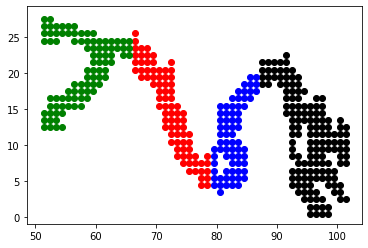

In [18]:
#----------------- Western Arabian Sea ---------------------#

lat_slice_wAS = slice(bounds_wAS[2],bounds_wAS[3]) 
lon_slice_wAS = slice(bounds_wAS[0],bounds_wAS[1]) 

#subset gridded data
temp_wAS = ds_WOA.temp_50_200.sel(lat = lat_slice_wAS, lon = lon_slice_wAS)
doxy_wAS = ds_WOA.doxy_50_200.sel(lat = lat_slice_wAS, lon = lon_slice_wAS)

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_wAS.lon),np.array(temp_wAS.lat))
xx_wAS = xx.flatten()
yy_wAS = yy.flatten()

mask_wAS = mask_coast(xx_wAS,yy_wAS,np.array(ds_WOA.coastal_mask_bounds))
temp_wAS = temp_wAS.stack(allpoints=['lat','lon'])[:,mask_wAS]
doxy_wAS = doxy_wAS.stack(allpoints=['lat','lon'])[:,mask_wAS]
xx_wAS = xx_wAS[mask_wAS]
yy_wAS = yy_wAS[mask_wAS]

mon_wAS = np.full(temp_wAS.shape,np.nan)
for tt in range(1,13):
    mon_wAS[tt-1,:] = np.ones([1,temp_wAS.shape[1]])*tt
    
temp_wAS = np.array(temp_wAS).flatten()
doxy_wAS = np.array(doxy_wAS).flatten()
mon_wAS = np.array(mon_wAS).flatten()

mon_wAS = mon_wAS[~np.isnan(temp_wAS)]
doxy_wAS = doxy_wAS[~np.isnan(temp_wAS)]
temp_wAS = temp_wAS[~np.isnan(temp_wAS)]


#----------------- Arabian Sea ---------------------#

lat_slice_AS = slice(bounds_AS[2],bounds_AS[3]) 
lon_slice_AS = slice(bounds_AS[0],bounds_AS[1]) 

#subset gridded data
temp_AS = ds_WOA.temp_50_200.sel(lat = lat_slice_AS, lon = lon_slice_AS)
doxy_AS = ds_WOA.doxy_50_200.sel(lat = lat_slice_AS, lon = lon_slice_AS)

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_AS.lon),np.array(temp_AS.lat))
xx_AS = xx.flatten()
yy_AS = yy.flatten()

mask_AS = mask_coast(xx_AS,yy_AS,np.array(ds_WOA.coastal_mask_bounds))
temp_AS = temp_AS.stack(allpoints=['lat','lon'])[:,mask_AS]
doxy_AS = doxy_AS.stack(allpoints=['lat','lon'])[:,mask_AS]
xx_AS = xx_AS[mask_AS]
yy_AS = yy_AS[mask_AS]

mon_AS = np.full(temp_AS.shape,np.nan)
for tt in range(1,13):
    mon_AS[tt-1,:] = np.ones([1,temp_AS.shape[1]])*tt
    
temp_AS = np.array(temp_AS).flatten()
doxy_AS = np.array(doxy_AS).flatten()
mon_AS = np.array(mon_AS).flatten()

mon_AS = mon_AS[~np.isnan(temp_AS)]
doxy_AS = doxy_AS[~np.isnan(temp_AS)]
temp_AS = temp_AS[~np.isnan(temp_AS)]

#---------------- Western Bay of Bengal --------------------#

lat_slice_wBoB = slice(bounds_wBoB[2],bounds_wBoB[3])
lon_slice_wBoB = slice(bounds_wBoB[0],bounds_wBoB[1])

#subset gridded data
temp_wBoB = ds_WOA.temp_50_200.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
doxy_wBoB = ds_WOA.doxy_50_200.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_wBoB.lon),np.array(temp_wBoB.lat))
xx_wBoB = xx.flatten()
yy_wBoB = yy.flatten()

mask_wBoB = mask_coast(xx_wBoB,yy_wBoB,np.array(ds_WOA.coastal_mask_bounds))
temp_wBoB = temp_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
doxy_wBoB = doxy_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
xx_wBoB = xx_wBoB[mask_wBoB]
yy_wBoB = yy_wBoB[mask_wBoB]

mon_wBoB = np.full(temp_wBoB.shape,np.nan)
for tt in range(1,13):
    mon_wBoB[tt-1,:] = np.ones([1,temp_wBoB.shape[1]])*tt
    
temp_wBoB = np.array(temp_wBoB).flatten()
doxy_wBoB = np.array(doxy_wBoB).flatten()
mon_wBoB = np.array(mon_wBoB).flatten()

mon_wBoB = mon_wBoB[~np.isnan(temp_wBoB)]
doxy_wBoB = doxy_wBoB[~np.isnan(temp_wBoB)]
temp_wBoB = temp_wBoB[~np.isnan(temp_wBoB)]


#---------------- Bay of Bengal --------------------#

lat_slice_BoB = slice(bounds_BoB[2],bounds_BoB[3])
lon_slice_BoB = slice(bounds_BoB[0],bounds_BoB[1])

#subset gridded data
temp_BoB = ds_WOA.temp_50_200.sel(lat = lat_slice_BoB, lon = lon_slice_BoB)
doxy_BoB = ds_WOA.doxy_50_200.sel(lat = lat_slice_BoB, lon = lon_slice_BoB)

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_BoB.lon),np.array(temp_BoB.lat))
xx_BoB = xx.flatten()
yy_BoB = yy.flatten()

mask_BoB = mask_coast(xx_BoB,yy_BoB,np.array(ds_WOA.coastal_mask_bounds))
temp_BoB = temp_BoB.stack(allpoints=['lat','lon'])[:,mask_BoB]
doxy_BoB = doxy_BoB.stack(allpoints=['lat','lon'])[:,mask_BoB]
xx_BoB = xx_BoB[mask_BoB]
yy_BoB = yy_BoB[mask_BoB]

mon_BoB = np.full(temp_BoB.shape,np.nan)
for tt in range(1,13):
    mon_BoB[tt-1,:] = np.ones([1,temp_BoB.shape[1]])*tt
        
temp_BoB = np.array(temp_BoB).flatten()
doxy_BoB = np.array(doxy_BoB).flatten()
mon_BoB = np.array(mon_BoB).flatten()

mon_BoB = mon_BoB[~np.isnan(temp_BoB)]
doxy_BoB = doxy_BoB[~np.isnan(temp_BoB)]
temp_BoB = temp_BoB[~np.isnan(temp_BoB)]

plt.scatter(xx_BoB,yy_BoB,color = 'k')
plt.scatter(xx_wBoB,yy_wBoB,color = 'b')
plt.scatter(xx_AS,yy_AS,color = 'r')
plt.scatter(xx_wAS,yy_wAS,color = 'g')

In [19]:
# group AS into IOD years

# load DMI data
ds_DMI= xr.open_dataset('../data/dmi_processed.nc')
ds_DMI

posIODyears = list(np.array(ds_DMI.pos_IOD_years))
negIODyears = list(np.array(ds_DMI.neg_IOD_years))
neuIODyears = list(np.array(ds_DMI.neu_IOD_years)) 

In [20]:
# Western Arabian Sea

####################################
# average over the positive IOD years -------------------------------------------# 
posIODdata_wAS,posIODlat_wAS,posIODlon_wAS,posIODtime_wAS,posIODmon_wAS,posIODseas_wAS = IOD_year_group(doxy_wAS_ia,
                                             lat_wAS_ia,lon_wAS_ia,time_wAS_ia,
                                             IODyear_begin,IODyear_end,posIODyears)

# average over the positive IOD years -------------------------------------------# 
negIODdata_wAS,negIODlat_wAS,negIODlon_wAS,negIODtime_wAS,negIODmon_wAS,negIODseas_wAS= IOD_year_group(doxy_wAS_ia,
                                             lat_wAS_ia,lon_wAS_ia,time_wAS_ia,
                                             IODyear_begin,IODyear_end,negIODyears)



# average over the positive IOD years -------------------------------------------# 
neuIODdata_wAS,neuIODlat_wAS,neuIODlon_wAS,neuIODtime_wAS,neuIODmonwAS,neuIODseas_wAS = IOD_year_group(doxy_wAS_ia,
                                             lat_wAS_ia,lon_wAS_ia,time_wAS_ia,
                                             IODyear_begin,IODyear_end,neuIODyears)



# Arabian Sea

####################################
# average over the positive IOD years -------------------------------------------# 
posIODdata_AS,posIODlat_AS,posIODlon_AS,posIODtime_AS,posIODmon_AS,posIODseas_AS = IOD_year_group(doxy_AS_ia,
                                             lat_AS_ia,lon_AS_ia,time_AS_ia,
                                             IODyear_begin,IODyear_end,posIODyears)

# average over the positive IOD years -------------------------------------------# 
negIODdata_AS,negIODlat_AS,negIODlon_AS,negIODtime_AS,negIODmon_AS,negIODseas_AS= IOD_year_group(doxy_AS_ia,
                                             lat_AS_ia,lon_AS_ia,time_AS_ia,
                                             IODyear_begin,IODyear_end,negIODyears)



# average over the positive IOD years -------------------------------------------# 
neuIODdata_AS,neuIODlat_AS,neuIODlon_AS,neuIODtime_AS,neuIODmon_AS,neuIODseas_AS = IOD_year_group(doxy_AS_ia,
                                             lat_AS_ia,lon_AS_ia,time_AS_ia,
                                             IODyear_begin,IODyear_end,neuIODyears)



# nwBoB

# 10-200

####################################
# average over the positive IOD years -------------------------------------------# 
posIODdata_nwBoB,posIODlat_nwBoB,posIODlon_nwBoB,posIODtime_nwBoB,posIODmon_nwBoB,posIODseas_nwBoB = IOD_year_group(doxy_nwBoB_ia,
                                             lat_nwBoB_ia,lon_nwBoB_ia,time_nwBoB_ia,
                                             IODyear_begin,IODyear_end,posIODyears)

# average over the positive IOD years -------------------------------------------# 
negIODdata_nwBoB,negIODlat_nwBoB,negIODlon_nwBoB,negIODtime_nwBoB,negIODmon_nwBoB,negIODseas_nwBoB = IOD_year_group(doxy_nwBoB_ia,
                                             lat_nwBoB_ia,lon_nwBoB_ia,time_nwBoB_ia,
                                             IODyear_begin,IODyear_end,negIODyears)



# average over the positive IOD years -------------------------------------------# 
neuIODdata_nwBoB,neuIODlat_nwBoB,neuIODlon_nwBoB,neuIODtime_nwBoB,neuIODmon_nwBoB,neuIODseas_nwBoB = IOD_year_group(doxy_nwBoB_ia,
                                             lat_nwBoB_ia,lon_nwBoB_ia,time_nwBoB_ia,
                                             IODyear_begin,IODyear_end,neuIODyears)


# wBoB

####################################
# average over the positive IOD years -------------------------------------------# 
posIODdata_swBoB,posIODlat_swBoB,posIODlon_swBoB,posIODtime_swBoB,posIODmon_swBoB,posIODseas_swBoB = IOD_year_group(doxy_swBoB_ia,
                                             lat_swBoB_ia,lon_swBoB_ia,time_swBoB_ia,
                                             IODyear_begin,IODyear_end,posIODyears)

# average over the positive IOD years -------------------------------------------# 
negIODdata_swBoB,negIODlat_swBoB,negIODlon_swBoB,negIODtime_swBoB,negIODmon_swBoB,negIODseas_swBoB = IOD_year_group(doxy_swBoB_ia,
                                             lat_swBoB_ia,lon_swBoB_ia,time_swBoB_ia,
                                             IODyear_begin,IODyear_end,negIODyears)



# average over the positive IOD years -------------------------------------------# 
neuIODdata_swBoB,neuIODlat_swBoB,neuIODlon_swBoB,neuIODtime_swBoB,neuIODmon_swBoB,neuIODseas_swBoB = IOD_year_group(doxy_swBoB_ia,
                                             lat_swBoB_ia,lon_swBoB_ia,time_swBoB_ia,
                                             IODyear_begin,IODyear_end,neuIODyears)





# BoB
####################################
# average over the positive IOD years -------------------------------------------# 
posIODdata_wBoB,posIODlat_wBoB,posIODlon_wBoB,posIODtime_wBoB,posIODmon_wBoB,posIODseas_wBoB = IOD_year_group(doxy_wBoB_ia,
                                             lat_wBoB_ia,lon_wBoB_ia,time_wBoB_ia,
                                             IODyear_begin,IODyear_end,posIODyears)

# average over the positive IOD years -------------------------------------------# 
negIODdata_wBoB,negIODlat_wBoB,negIODlon_wBoB,negIODtime_wBoB,negIODmon_wBoB,negIODseas_wBoB = IOD_year_group(doxy_wBoB_ia,
                                             lat_wBoB_ia,lon_wBoB_ia,time_wBoB_ia,
                                             IODyear_begin,IODyear_end,negIODyears)


# average over the positive IOD years -------------------------------------------# 
neuIODdata_wBoB,neuIODlat_wBoB,neuIODlon_wBoB,neuIODtime_wBoB,neuIODmon_wBoB,neuIODseas_wBoB = IOD_year_group(doxy_wBoB_ia,
                                             lat_wBoB_ia,lon_wBoB_ia,time_wBoB_ia,
                                             IODyear_begin,IODyear_end,neuIODyears)



# eBoB

####################################
# average over the positive IOD years -------------------------------------------# 
posIODdata_BoB,posIODlat_BoB,posIODlon_BoB,posIODtime_BoB,posIODmon_BoB,posIODseas_BoB = IOD_year_group(doxy_BoB_ia,
                                             lat_BoB_ia,lon_BoB_ia,time_BoB_ia,
                                             IODyear_begin,IODyear_end,posIODyears)

# average over the positive IOD years -------------------------------------------# 
negIODdata_BoB,negIODlat_BoB,negIODlon_BoB,negIODtime_BoB,negIODmon_BoB,negIODseas_BoB = IOD_year_group(doxy_BoB_ia,
                                             lat_BoB_ia,lon_BoB_ia,time_BoB_ia,
                                             IODyear_begin,IODyear_end,negIODyears)



# average over the positive IOD years -------------------------------------------# 
neuIODdata_BoB,neuIODlat_BoB,neuIODlon_BoB,neuIODtime_BoB,neuIODmon_BoB,neuIODseas_BoB = IOD_year_group(doxy_BoB_ia,
                                             lat_BoB_ia,lon_BoB_ia,time_BoB_ia,
                                             IODyear_begin,IODyear_end,neuIODyears)



# Histograms and K-S test

Ks Test Sources
https://abhyankar-ameya.medium.com/kolmogorov-smirnov-two-sample-test-with-python-70c309107c78

http://www.stats.ox.ac.uk/~massa/Lecture%2013.pdf

https://stackoverflow.com/questions/10884668/two-sample-kolmogorov-smirnov-test-in-python-scipy

https://math.stackexchange.com/questions/1251401/kolmogorov-smirnov-two-sample-test

http://www.stat.yale.edu/Courses/1997-98/101/sigtest.htm

not exactly python but helpul

https://www.graphpad.com/guides/prism/8/statistics/interpreting_results_kolmogorov-smirnov_test.htm



# Bar Chart

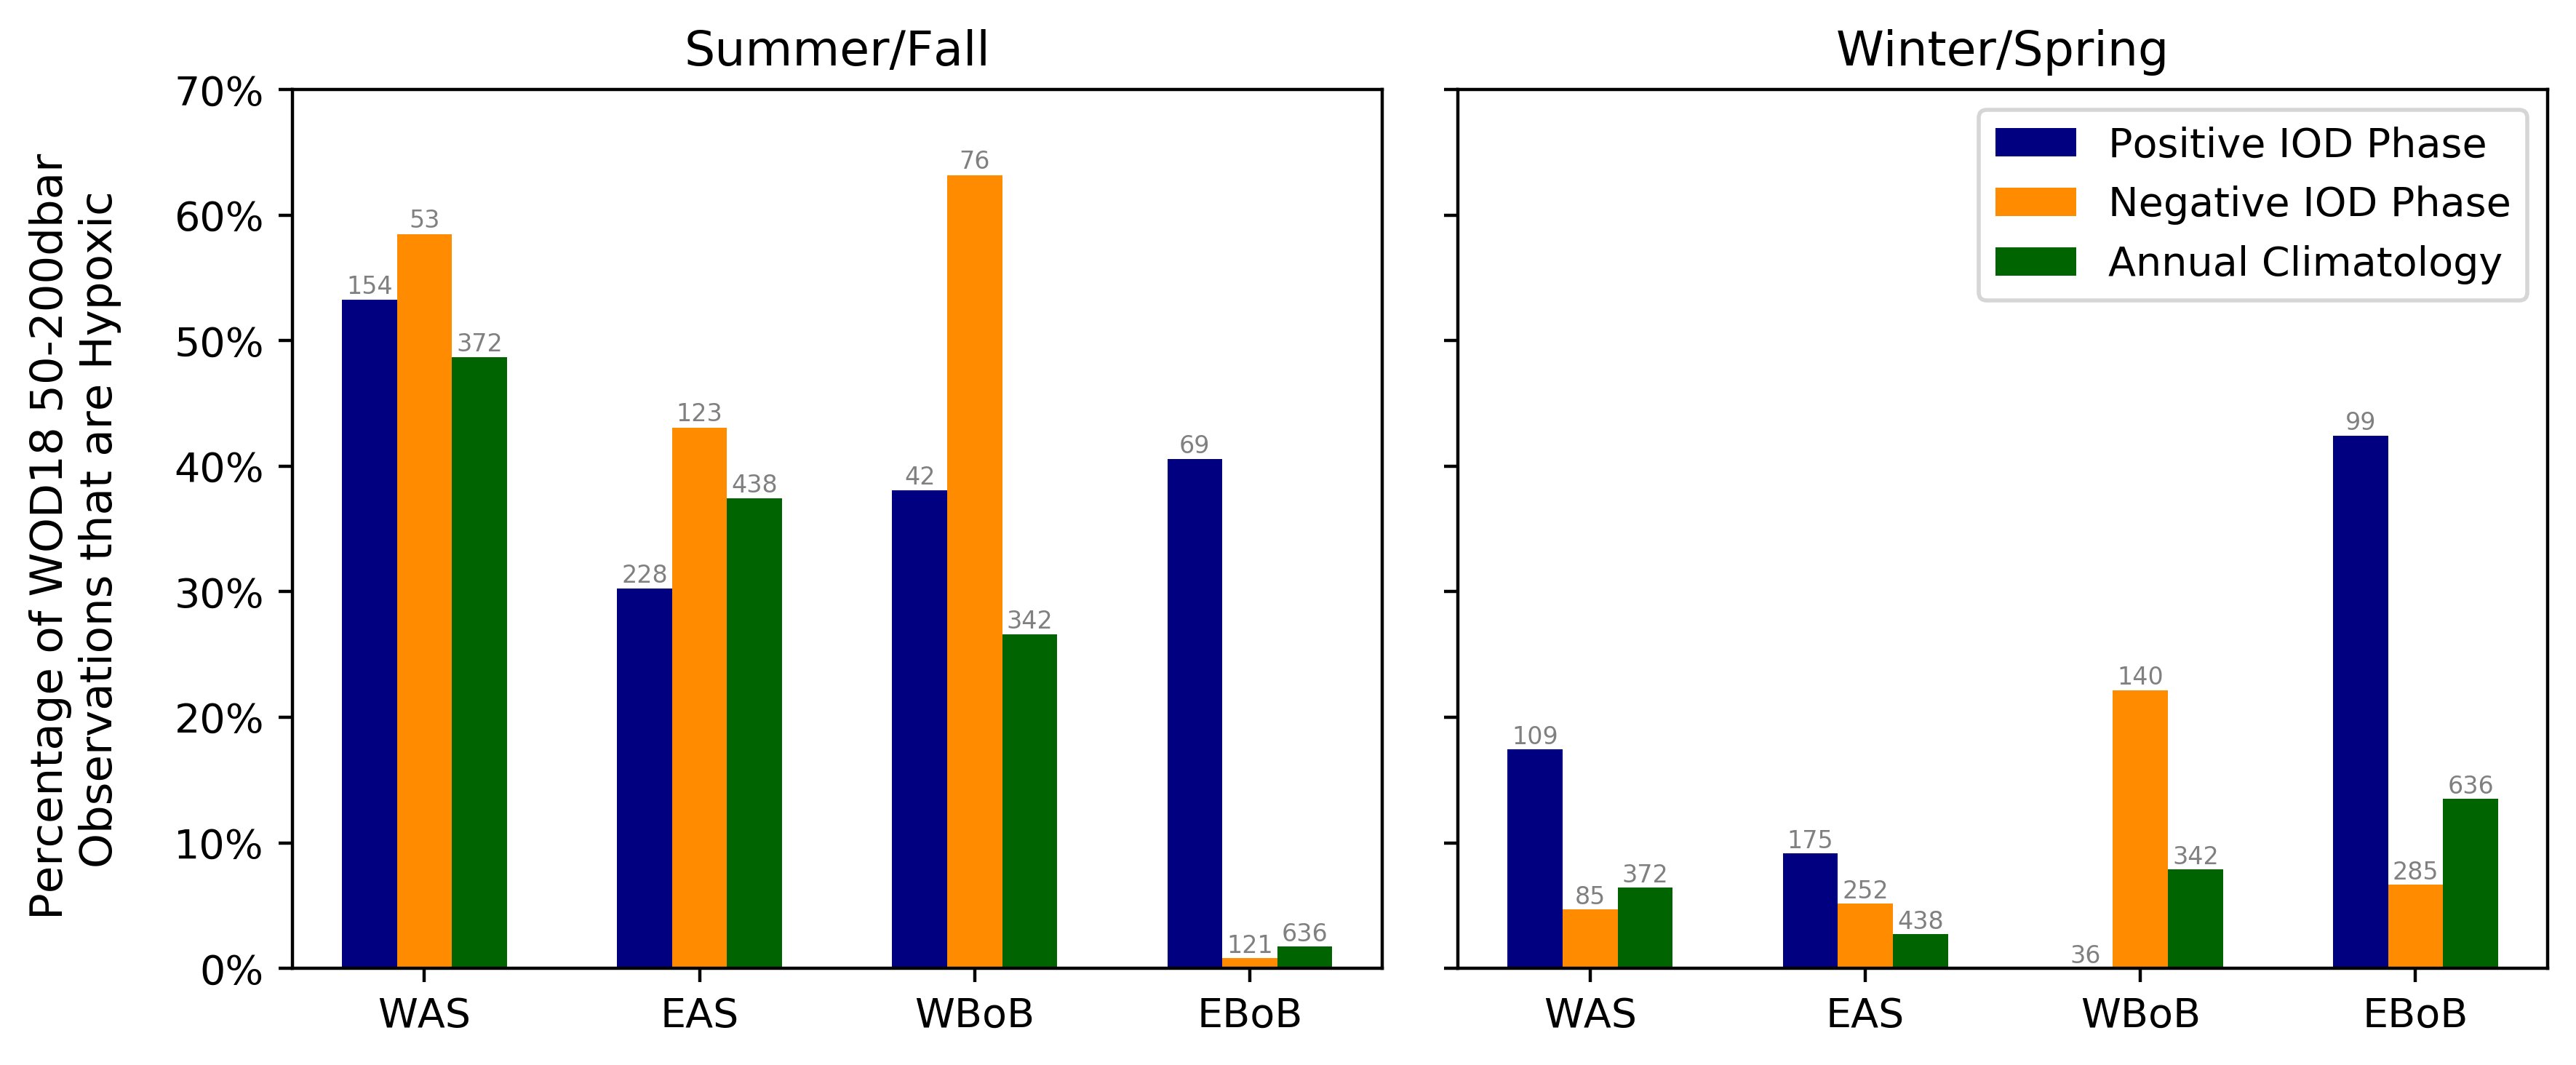

In [21]:
# Make Histograms 
binedges = np.linspace(0,250,12)
# colors = ['teal','orange','purple']
colors = ['#003466','#C47900']
letters = ['a','b','c','d','e','f']
x = [1,2,3,4]

fig = plt.figure(figsize=(10, 4), dpi=400)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

params = {'legend.fontsize': 10,
         'axes.labelsize': 11,
         'axes.titlesize': 12,
         'xtick.labelsize':10,
         'ytick.labelsize':10}

pylab.rcParams.update(params)

#########################
data_wAS = [posIODdata_wAS,negIODdata_wAS,doxy_wAS_ia,doxy_wAS]
data_AS = [posIODdata_AS,negIODdata_AS,doxy_AS_ia,doxy_AS]
data_wBoB = [posIODdata_wBoB,negIODdata_wBoB,doxy_wBoB_ia,doxy_wBoB]
data_BoB = [posIODdata_BoB,negIODdata_BoB,doxy_BoB_ia,doxy_BoB]

time_data_wAS = [posIODmon_wAS,negIODmon_wAS,mon_wAS_ia,mon_wAS]
time_data_AS = [posIODmon_AS,negIODmon_AS,mon_AS_ia,mon_AS]
time_data_wBoB = [posIODmon_wBoB,negIODmon_wBoB,mon_wBoB_ia,mon_wBoB]
time_data_BoB = [posIODmon_BoB,negIODmon_BoB,mon_BoB_ia,mon_BoB]


for pp in range(4):

    if pp==0:
        pdata = data_wAS[0]
        ndata = data_wAS[1]
        alldata = data_wAS[2]
        sdata = data_wAS[3]

        ptdata = time_data_wAS[0]
        ntdata = time_data_wAS[1]
        alltdata = time_data_wAS[2]
        stdata = time_data_wAS[3]

    elif pp==1:
        pdata = data_AS[0]
        ndata = data_AS[1]
        alldata = data_AS[2]
        sdata = data_AS[3]

        ptdata = time_data_AS[0]
        ntdata = time_data_AS[1]
        alltdata = time_data_AS[2]
        stdata = time_data_AS[3]

    elif pp==2:
        pdata = data_wBoB[0]
        ndata = data_wBoB[1]
        alldata = data_wBoB[2]
        sdata = data_wBoB[3]

        ptdata = time_data_wBoB[0]
        ntdata = time_data_wBoB[1]
        alltdata = time_data_wBoB[2]
        stdata = time_data_wBoB[3]

    else:
        pdata = data_BoB[0]
        ndata = data_BoB[1]
        alldata = data_BoB[2]
        sdata = data_BoB[3]

        ptdata = time_data_BoB[0]
        ntdata = time_data_BoB[1]
        alltdata = time_data_BoB[2]
        stdata = time_data_BoB[3]

    # O2
    x1 = pdata[~np.isnan(pdata)]
    x2 = ndata[~np.isnan(ndata)]
    x3 = alldata[~np.isnan(alldata)]
    x4 = sdata[~np.isnan(sdata)]

    x1t = ptdata[~np.isnan(pdata)]
    x2t = ntdata[~np.isnan(ndata)]
    x3t = alltdata[~np.isnan(alldata)]
    x4t = stdata[~np.isnan(stdata)]

    # get seasonal indicies
    ind_sf = (x1t == 6) | (x1t == 7) | (x1t == 8) | (x1t == 9) | (x1t == 10) | (x1t == 11)
    ind_ws = (x1t == 12) | (x1t == 1) | (x1t == 2) | (x1t == 3) | (x1t == 4) | (x1t ==5)

    x1_sf = x1[ind_sf]
    x1_ws = x1[ind_ws]

    ind_sf = (x2t == 6) | (x2t == 7) | (x2t == 8) | (x2t == 9) | (x2t == 10) | (x2t == 11)
    ind_ws = (x2t == 12) | (x2t == 1) | (x2t == 2) | (x2t == 3) | (x2t == 4) | (x2t ==5)

    x2_sf = x2[ind_sf]
    x2_ws = x2[ind_ws]

    ind_sf = (x3t == 6) | (x3t == 7) | (x3t == 8) | (x3t == 9) | (x3t == 10) | (x3t == 11)
    ind_ws = (x3t == 12) | (x3t == 1) | (x3t == 2) | (x3t == 3) | (x3t == 4) | (x3t ==5)

    x3_sf = x3[ind_sf]
    x3_ws = x3[ind_ws]
    
    ind_sf = (x4t == 6) | (x4t == 7) | (x4t == 8) | (x4t == 9) | (x4t == 10) | (x4t == 11)
    ind_ws = (x4t == 12) | (x4t == 1) | (x4t == 2) | (x4t == 3) | (x4t == 4) | (x4t ==5)

    x4_sf = x4[ind_sf]
    x4_ws = x4[ind_ws]

#     # close to hypoxic 
#     piod_hyp_c = np.round(np.sum(x1_sf<71)/len(x1_sf)*100,2)
#     niod_hyp_c = np.round(np.sum(x2_sf<71)/len(x2_sf)*100,2)
#     seas_hyp_c = np.round(np.sum(x4_sf<71)/len(x4_sf)*100,2)

#     ax1.bar(x[pp]-0.2,piod_hyp_c, color='navy', align='center', width = 0.2, alpha = 0.15)
#     ax1.bar(x[pp],niod_hyp_c, color='darkorange', align='center', width = 0.2, alpha = 0.15)
#     ax1.bar(x[pp]+0.2,seas_hyp_c, color='darkgreen', align='center', width = 0.2, alpha = 0.15)
    
    # percents
    piod_hyp = np.round(np.sum(x1_sf<61)/len(x1_sf)*100,2)
    niod_hyp = np.round(np.sum(x2_sf<61)/len(x2_sf)*100,2)
    seas_hyp = np.round(np.sum(x4_sf<61)/len(x4_sf)*100,2)

    ax1.bar(x[pp]-0.2,piod_hyp, color='navy', align='center', width = 0.2)
    ax1.bar(x[pp],niod_hyp, color='darkorange', align='center', width = 0.2)
    ax1.bar(x[pp]+0.2,seas_hyp, color='darkgreen', align='center', width = 0.2)
    
    ax1.text(x[pp]-0.2,1.002*piod_hyp,'%d' % len(x1_sf), ha='center', va='bottom', fontsize = 6, color = 'gray')
    ax1.text(x[pp],1.002*niod_hyp,'%d' % len(x2_sf), ha='center', va='bottom', fontsize = 6, color = 'gray')
    ax1.text(x[pp]+0.2,1.002*seas_hyp,'%d' % len(x4_sf), ha='center', va='bottom', fontsize = 6, color = 'gray')


    ax1.set_ylabel('Percentage of WOD18 50-200dbar \nObservations that are Hypoxic', labelpad = 13)
    ax1.set_title('Summer/Fall')
    ax1.set_xticks([1,2,3,4])
    ax1.set_xticklabels(['WAS','EAS','WBoB','EBoB'])
    ax1.set_yticks([0,10,20,30,40,50,60,70])
    ax1.set_yticklabels(['0%','10%','20%','30%','40%','50%','60%','70%'])
    ax1.set_ylim([0,70])
    
#     # close to hypoxic 
#     piod_hyp_c = np.round(np.sum(x1_ws<71)/len(x1_ws)*100,2)
#     niod_hyp_c = np.round(np.sum(x2_ws<71)/len(x2_ws)*100,2)
#     seas_hyp_c = np.round(np.sum(x4_ws<71)/len(x4_ws)*100,2)

#     ax2.bar(x[pp]-0.2,piod_hyp_c, color='navy', align='center', width = 0.2, alpha = 0.15)
#     ax2.bar(x[pp],niod_hyp_c, color='darkorange', align='center', width = 0.2, alpha = 0.15)
#     ax2.bar(x[pp]+0.2,seas_hyp_c, color='darkgreen', align='center', width = 0.2, alpha = 0.15)

    # percents 
    
    piod_hyp = np.round(np.sum(x1_ws<61)/len(x1_ws)*100,2)
    niod_hyp = np.round(np.sum(x2_ws<61)/len(x2_ws)*100,2)
    seas_hyp = np.round(np.sum(x4_ws<61)/len(x4_ws)*100,2)
    
    if pp == 0:
        ax2.bar(x[pp]-0.2,piod_hyp, color='navy', align='center', width = 0.2, label = 'Positive IOD Phase')
        ax2.bar(x[pp],niod_hyp, color='darkorange', align='center', width = 0.2, label = 'Negative IOD Phase')
        ax2.bar(x[pp]+0.2,seas_hyp, color='darkgreen', align='center', width = 0.2, label = 'Annual Climatology')
        
    else:
        ax2.bar(x[pp]-0.2,piod_hyp, color='navy', align='center', width = 0.2)
        ax2.bar(x[pp],niod_hyp, color='darkorange', align='center', width = 0.2)
        ax2.bar(x[pp]+0.2,seas_hyp, color='darkgreen', align='center', width = 0.2)


    ax2.text(x[pp]-0.2,1.002*piod_hyp,'%d' % len(x1_ws), ha='center', va='bottom', fontsize = 6, color = 'gray')
    ax2.text(x[pp],1.002*niod_hyp,'%d' % len(x2_ws), ha='center', va='bottom', fontsize = 6, color = 'gray')
    ax2.text(x[pp]+0.2,1.002*seas_hyp,'%d' % len(x4_ws), ha='center', va='bottom', fontsize = 6, color = 'gray')

    ax2.set_title('Winter/Spring')
    ax2.set_xticks([1,2,3,4])
    ax2.set_xticklabels(['WAS','EAS','WBoB','EBoB'])
    ax2.set_yticks([0,10,20,30,40,50,60,70])
    ax2.set_yticklabels([])
    ax2.set_ylim([0,70])

plt.legend()

plt.subplots_adjust(wspace = 0.07)

# Repeat for 40-200

# Repeat for 50-225

# Redo for WOD18

In [22]:
# AWG
ds_WOD = xr.open_dataset('../data/wod18_processed.nc')
ds_WOD

<xarray.Dataset>
Dimensions:                      (coastal_loc: 310791, coastal_pos: 114356, lonmin,lonmax,latmin,latmax: 4, pres: 57, time: 310791)
Coordinates:
  * time                         (time) datetime64[ns] 1770-01-01 ... 2019-12-31
  * pres                         (pres) int64 0 5 10 15 ... 1350 1400 1450 1500
  * coastal_loc                  (coastal_loc) int64 0 1 2 ... 310789 310790
  * coastal_pos                  (coastal_pos) int64 0 1 2 ... 114354 114355
  * lonmin,lonmax,latmin,latmax  (lonmin,lonmax,latmin,latmax) int64 0 1 2 3
Data variables:
    temp                         (time, pres) float64 ...
    sal                          (time, pres) float64 ...
    doxy                         (time, pres) float64 ...
    nitrate                      (time, pres) float64 ...
    phosphate                    (time, pres) float64 ...
    lat                          (time) float32 ...
    lon                          (time) float32 ...
    temp_40_200                  (ti

In [23]:
mon_wAS.shape, xx_wAS.shape

((744,), (90,))